In [12]:
library(readxl)
library(data.table)
library(ggplot2)
library(ggprism)
library(ggforce)
library(ggetho)
library(ggsignif)
source("library.R", local = T)

In [13]:
R.home()

[1] "/usr/lib/R"

In [14]:
sheets <- c("20min STM", "20min STM unpaired", "1hr STM", "2hr STM", "3hr STM")
data_clean_long <- data.table::fread(file = "tidy_data.csv")
data_clean_long$test <- factor(data_clean_long$test, levels=c("PRE", "POST"))
data_clean_long$interval <- factor(data_clean_long$interval, levels=c("NONE"))
data_clean_long$experiment <- factor(data_clean_long$experiment, levels=c("20min STM", "20min STM unpaired"))

In [15]:
experiments <- c("20min STM", "20min STM unpaired")

In [16]:
panel1_data <- data_clean_long[interval=="NONE" & experiment %in% experiments & Genotype %in% c("Iso31", "MB010B.(II)SPARC-Chrimson ISO", "MB010B.(II)SPARC-GFP ISO"),]

In [17]:
panel1_data$experiment <- factor(panel1_data$experiment, levels=experiments)

In [18]:
panel1_data <- panel1_data[User=="CH",]

In [19]:
panel1_data[,table(Genotype)]

Genotype
MB010B.(II)SPARC-Chrimson ISO      MB010B.(II)SPARC-GFP ISO 
                          228                            66 

In [20]:
panel1_data[test=="POST", mean(PI), by=experiment]

experiment,V1
<fct>,<dbl>
20min STM,-0.3127419
20min STM unpaired,0.1380556


In [21]:
size_unit=2.5

[1] -1.02  1.00


Warning message in geom_signif(data = annotation_df, aes(annotations = stars), xmin = 1, :
“Ignoring unknown aesthetics: annotations”


png 
  2

$gg

$n_facets
[1] 2

$direction
[1] "horizontal"


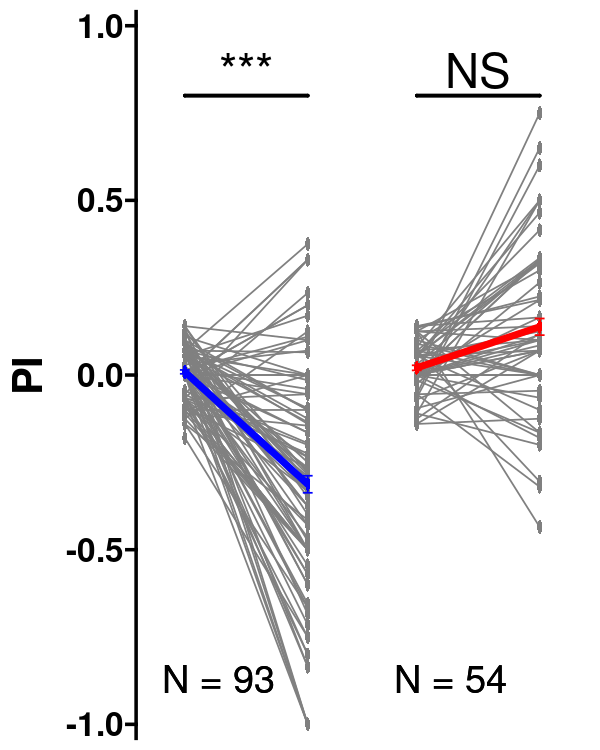

In [22]:
ratio=2.5
panel1A <- learning_plot(
    panel1_data, "experiment", direction="horizontal",
    starsize=10, textsize=8,
    hjust_text=0.2, y_annotation=0.8, colors=colors_panel1, y_limits=y_limits_panel1
)
save_learning_plot(plot = panel1A, filename = "figures/panel1A.svg", size_unit=size_unit, ratio=ratio)
options(repr.plot.height=size_unit*ratio, repr.plot.width=size_unit*panel1A$n_facets)

panel1A

In [23]:
R.home()

[1] "/usr/lib/R"

Warning message:
“Removed 3 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 3 rows containing non-finite values (`stat_signif()`).”


png 
  2

Warning message:
“Removed 3 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 3 rows containing non-finite values (`stat_signif()`).”


$gg

$n_facets
[1] 2


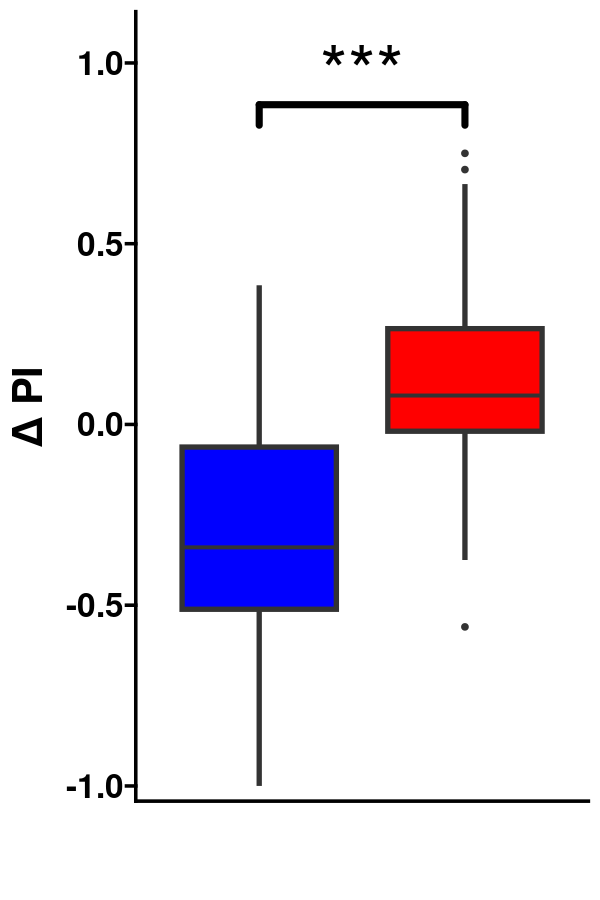

In [24]:
ratio=3
panel1B <- summary_plot(
    panel1_data,
    group = "experiment",
    colors=colors_panel1,
    comparisons=list(c("20min STM", "20min STM unpaired")),
    annotation_y=0.79,
    y_limits=c(-1, 1.1),
    text_y_size=20,
    title_y_size=25
)
panel1B$gg <- panel1B$gg + theme(axis.text.x = element_blank(), axis.ticks.x = element_blank()) 
save_summ_plot(plot = panel1B, filename = "figures/panel1B.svg", size_unit=size_unit, ratio=ratio)
options(repr.plot.height=size_unit*ratio, repr.plot.width=size_unit*panel1B$n_facets)
panel1B